# Image란?

## Image는 width X height X channel 의 pixels로 이루어진 matrix

- width: 너비로 이미지의 가로 길이를 의미한다.
- height: 높이로 이미지의 세로 길이를 의미한다.

- pixel: image가 가지고 있는 값으로 width X height 개수만큼 존재한다. image를 표현하는 bit방식에 따라 값의 범위가 달라진다.

- 일반적인 Image는 unsigned integer 8bit로 표현
    - 0 ~ 255 로 표현
- bit수가 높아질 수록 표현할 수 있는 색의 범위가 증가한다.   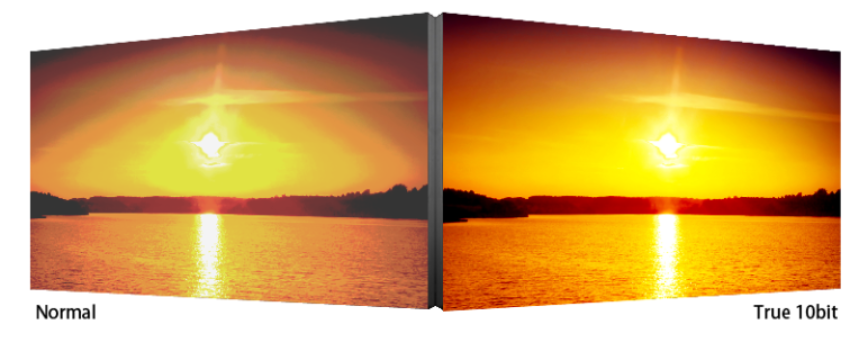

# Open CV 개요
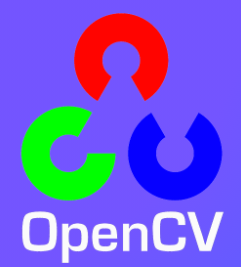

- https://opencv.org/
- 튜토리얼: https://docs.opencv.org/master/
- Open Source Computer Vision Library로 실시간 computer vision을 목적으로 개발됨
- Intel에서 개발하다가 open source화 됨
- Cross Platform이기 때문에 Windows, Mac, Linux, OS에 상관없이 동작 가능
- C/C++로 개발 되었으나 Python, JAVA, MATLAB의 개발 환경도 지원한다.
- 실시간에 초점을 맞추고 나온 library이기 때문에 mobile camera나 로봇 등에 recognition module로 붙여 영상처리에 활용된다.

# OpenCV 설치

- `!pip install opencv-contrib-python`

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 읽기
- **`imread(filename [, flag]) : ndarray`**
    - 이미지를 읽는다.
        
    - filename: 읽어들일 이미지 파일경로
    - flag: 읽기 모드
        - cv2.IMREAD_XXXXX 상수를 이용한다.
        - IMREAD_COLOR가 기본(BGR 모드)
            - matplotlib에서 출력시 rgb 모드로 변환해야 한다.

### matplotlib 으로 출력
- jupyter notebook 내에 출력이 가능

In [3]:
# image 읽기
img_BGR = cv2.imread('images/penguin.jpg')

In [4]:
print(type(img_BGR))
print(img_BGR.shape)

<class 'numpy.ndarray'>
(222, 296, 3)


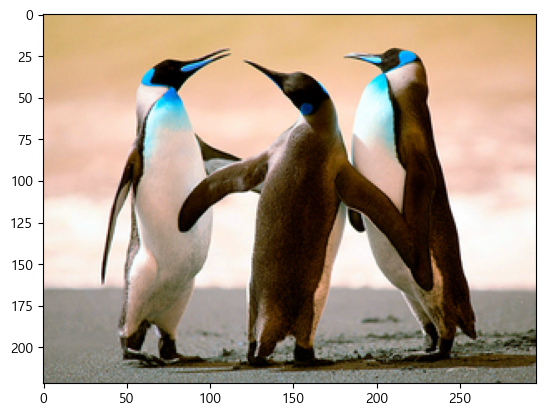

In [5]:
plt.imshow(img_BGR)
plt.show()

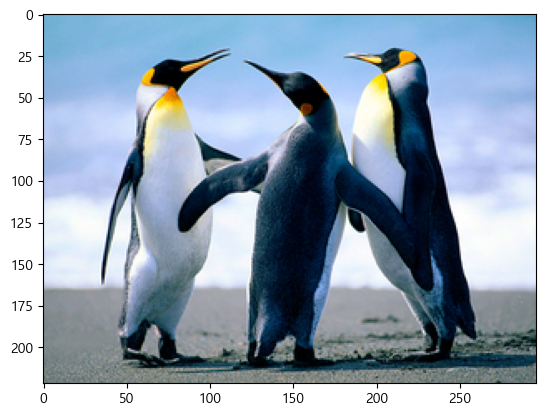

In [6]:
plt.imshow(img_BGR[:, :, ::-1])
plt.show()

## 색공간 변환
- **`cv2.cvtColor(src, code)`**
    - image 의 color space를 변환한다. 
    - src: 변환시킬 이미지 (ndarray)
    - code
        - 변환시킬 색공간 타입 지정
        - cv2.COLOR_XXX**2**YYY 형태의 상수 지정(XXX를YYY로 변환)
            - cv2.COLOR_XXX2YYY 형태의 상수 지정(XXX를YYY로 변환)
            - cv2.COLOR_BGR2GRAY / cv2.COLOR_GRAY2BGR (BGR <-> GRAY)
            - cv2.COLOR_BGR2RGB  / cv2.COLOR_RGB2BGR  (BGR <-> RGB)
            - cv2.COLOR_BGR2HSV  / cv2.COLOR_HSV2BGR  (BGR <-> HSV)

> ### HSV
> - Hue: 색상, 색의 종류
> - Saturation: 채도. 색의 선명도
> - Value : 명도. 밝기

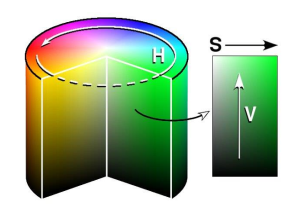
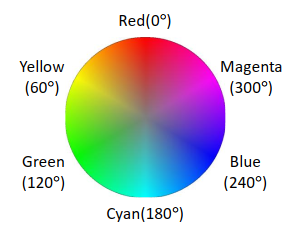

In [7]:
plt.imshow(img1[:, :, ::-1])

NameError: name 'img1' is not defined

In [ ]:
# BGR 모드인 img1을 RGB 모드로 변환해보자.
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)

plt.imshow(img_RGB)
plt.show()

In [ ]:
img_GRAY = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2GRAY)

print(img_GRAY.shape)

plt.imshow(img_GRAY, cmap = 'gray')
plt.show()

## 채널 확인
- 채널별로 나눠 이미지 출력

In [ ]:
# 먼저 img_BGR의 shape을 확인해보자.
img_BGR.shape

In [ ]:
# 각 channel별로 image를 추출한 후 각각의 shape을 확인해보자.
blue = img_BGR[:, :, 0]
green = img_BGR[:, :, 1]
red = img_BGR[:, :, 2]

print(blue.shape, green.shape, red.shape)

In [ ]:
# channel별로 추출한 image를 따로 그려보자.
plt.figure(figsize = (10, 8))

plt.subplot(2, 2, 1)
plt.title('Original', fontsize = 20)
plt.imshow(img_BGR[:, :, ::-1])
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Blue', fontsize = 20)
plt.imshow(blue, cmap = 'Blues_r')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Green', fontsize = 20)
plt.imshow(green, cmap = 'Greens_r')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Red', fontsize = 20)
plt.imshow(red, cmap = 'Reds_r')
plt.axis('off')

plt.tight_layout()
plt.show()

## cv2에서 이미지 출력
- **`cv2.imshow(winname, mat)`**
    - 창을 띄워 이미지를 출력한다.
    - winname: 창 이름
        - 창이름이 같으면 같은 창에 띄운다.
    - mat: 출력할 이미지(ndarray)
        - dtype이 uint8이어야 정상 출력된다. (float일 경우 255를 곱해서 출력한다.)
- **`cv2.imwrite(filename, img): bool`**
    - 이미지 파일로 저장
    - filename: 저장할 파일경로
    - img: 저장할 이미지(ndarray)

In [ ]:
cv2.imshow('window', img_BGR)  # ('windw 이름', OpenCV로 읽은 image 이름)
cv2.waitKey(0)              # image window를 key가 입력될 때까지 대기시킨다.
cv2.destroyAllWindows()     # image를 출력하는 window를 모두 닫는다.

In [ ]:
cv2.imshow('window', img1)
cv2.waitKey(3000)
cv2.destroyAllWindows()

In [ ]:
# window 이름을 같게 설정하면 하나의 window에 image를 출력한다.
# window 이름을 다르게 설정하면 여러 개의 window에 각각의 image를 출력한다.

In [ ]:
# waitKey() 함수에는 최대 대기 시간을 mili초로 입력해 사용할 수도 있다.
# 즉 위의 코드는 3000ms(3s)동안 대기하는 것이다. 3초 동안 key입력이 없으면 window가 닫힌다.

In [ ]:
cv2.imshow('frame_GRAY', img_GRAY)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
img_penguin = cv2.imread('images/penguin.jpg')
img_lenna = cv2.imread('images/lenna.bmp')
img_penguin_GRAY = cv2.cvtColor(img_penguin, cv2.COLOR_BGR2GRAY)

print(img_penguin.shape, img_lenna.shape, img_penguin_GRAY.shape)
print(img_penguin.dtype, img_lenna.dtype, img_penguin_GRAY.dtype)

In [ ]:
cv2.imshow('frame_penguin', img_penguin)
cv2.waitKey(0)

cv2.imshow('frame_lenna', img_lenna)
cv2.waitKey(0)

cv2.imshow('frame_penguin_GRAY', img_penguin_GRAY)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [ ]:
cv2.imshow('frame', img_penguin)
cv2.waitKey(0)

cv2.imshow('frame', img_lenna)
cv2.waitKey(0)

cv2.imshow('frame', img_penguin_GRAY)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [ ]:
cv2.imshow('frame', img_penguin)
while True:
    if cv2.waitKey(0) == ord('q'):
        break
cv2.destroyAllWindows()

In [ ]:
# 경로 설정
save_path = 'images/penguin_gray.jpg'
cv2.imwrite(save_path, img_penguin_GRAY)

# 동영상 처리

## 동영상 읽기
- VideoCapture 클래스사용
    - 객체 생성
        - VideoCapture('동영상파일 경로'): 동영상파일
        - VideoCapture(웹캠 ID): 웹캠
- VideoCapture의 주요 메소드
    - isOpened(): bool
        - 입력 대상과 연결되었는지 여부반환
    - read(): (bool, img)
        - Frame 이미지로 읽기
        - 반환값
            - bool: 읽었는지 여부
            - img: 읽은 이미지(ndarray)

#### 동영상파일

- FPS(Frame Per Second)
    - 1초에 몇 frame을 보여주는지를 의미한다. FPS가 클수록 영상의 움직임이 자연스럽다.
    - 보통 FPS를 30으로 두고 사용한다.
    - 동영상 file에 설정되어 있다.
    - 동영상 file의 FPS에 맞춰서 즉 재생 속도를 맞춰서 동영상을 재생해야한다. 이를 구현하려면 한 frame을 보여주고 FPS에 맞는 시간 간격만큼 기다려야 한다.
        - 기다리는 시간: 시간 / FPS
            - 1 / FPS: 초 단위로 확인
            - 1000 / FPS: mili 초 단위로 확인
                - cv2.waitKey() 함수는 mili 초를 사용하므로 이 값을 사용해야 한다. 반드시 int로 형변환을 해야 한다.
        - DELAY 시간을 이용해 동영상 재생 속도를 조절할 수 있다.
- 동영상 file의 FPS를 확인하는 방법
    - 

In [ ]:
# 웹캠의 FPS 확인

In [ ]:
cap_tmp = cv2.VideoCapture(0)

DELAY = 1 / FPS
print(FPS)

cap_tmp.release()

In [ ]:
# 동영상 file의 FPS 확인

In [8]:
cap_tmp = cv2.VideoCapture('images/wave.mp4')

FPS = cap_tmp.get(cv2.CAP_PROP_FPS)
DELAY = 1000 / FPS
print(FPS, f'{DELAY} 초')

cap_tmp.release()

29.97002997002997 33.36666666666667 초


In [10]:
cap = cv2.VideoCapture('images/wave.mp4')

# FPS 계산
FPS = cap.get(cv2.CAP_PROP_FPS)

# DELAY 계산
DELAY = int(1000 / FPS)

while cap.isOpened():
    success, image = cap.read()
    if not success:
        print('동영상을 읽는 데 실패했습니다.')
        break
    
    cv2.imshow('frame', image)
    
    if cv2.waitKey(DELAY) == 27:
        break

cap.release()
cv2.destroyAllWindows()

In [13]:
cap = cv2.VideoCapture('images/wave.mp4')

# FPS 계산
FPS = cap.get(cv2.CAP_PROP_FPS)

# DELAY 계산
DELAY = int(1000 / FPS)

while cap.isOpened():
    success, image = cap.read()
    if not success:
        print('동영상을 읽는 데 실패했습니다.')
        break
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame', image)
    
    if cv2.waitKey(DELAY) == 27:
        break

cap.release()
cv2.destroyAllWindows()

동영상을 읽는 데 실패했습니다.


#### 웹캠

In [80]:
cap = cv2.VideoCapture(0)

print(cap.isOpened())

while True:
    # frame을 한 개씩 읽어온다. read()는 연결 성공 여부와 image를 각각 boolean과 ndarray로 반환해준다.
    success, image = cap.read()
    if not success:
        print('frame을 읽어오지 못함')
        break
    
    # 읽은 frame을 한 개씩 출력한다.
    image = cv2.flip(image, 1)
    cv2.imshow('frame', image)
    if cv2.waitKey(1000) == 27:     # 이때 27은 esc key를 의미한다. 즉 esc key를 입력하면 종료하는 것이다.
        break
        
cap.release()
cv2.destroyAllWindows()

True


### 동영상 저장
- capture(read)한 이미지 프레임을 연속적으로 저장하면 동영상 저장이 된다.
- VideoWriter 객체를 이용해 저장
    - **`VideoWriter(filename, codec, fps, size)`**
        - filename: 저장경로
        - codec
            - VideoWriter_fourcc 이용
            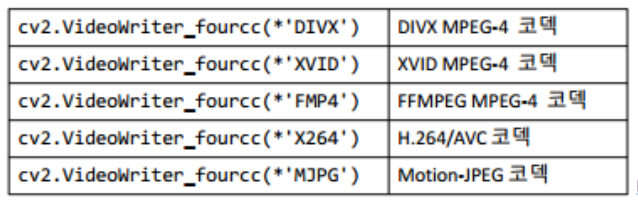
        - fps
            - FPS (Frame Per Second) - 초당 몇 프레임인지 지정
        - size
            - 저장할 frame 크기로 원본 동영상이나 웹캠의 width, height 순서로 넣는다.
    - `VideoWriter().write(img)`
        - Frame 저장

In [18]:
# 웹캠에서 읽은 동영상을 file로 저장하는 방법

# VideoCapture() instance를 생성한다.
cap = cv2.VideoCapture(0)

# 동영상을 저장할 때는 image의 size를 꼭 알아야 한다.
# 동영상의 size 조회 방법
_, img = cap.read()
print(img.shape)

# size는 (width, height) 순서로 저장되어야 한다.
size = (img.shape[1], img.shape[0])

# 저장할 방법을 설정한다.
codec = cv2.VideoWriter_fourcc(*'MJPG')

# FPS를 정의한다.
FPS = cap.get(cv2.CAP_PROP_FPS)

# 파일 경로를 설정한다.
filepath = 'images/webcam_output.avi'

# VideoWrite() instance를 생성한다.
writer = cv2.VideoWriter(filepath, codec, FPS, size)

while True:
    succes, image = cap.read()
    if not succes:
        print('캡처 실패')
        break
    
    image = cv2.flip(image, 1)
    cv2.imshow('frame', image)
    writer.write(image)
    if cv2.waitKey(1) == 27:
        break


cap.release()
writer.release()
cv2.destroyAllWindows()

(720, 1280, 3)


In [16]:
size

(1280, 720)

# TODO: 웹캠에서 입력된 이미지를 화면에 보여주면서 파일로 저장
- 30장당 한장씩 저장한다.
- 파일형식: output_capture/cap_번호.jpg 

In [79]:
cap = cv2.VideoCapture(0)

cnt = 0
while True:
    # frame을 하나씩 읽는다.
    success, image = cap.read()
    if not success:
        print('frame을 읽어오지 못했습니다.')
        break
    
    # frame을 하나씩 출력한다.
    image = cv2.flip(image, 1)
    cv2.imshow('frame', image)
    
    cnt += 1
    if cnt % 30 == 0:
        cv2.imwrite(f'ouput_capture/cap_{cnt // 30}.jpg', image)
    
    if cv2.waitKey(1) == 27:
        break   
    
cap.release()
cv2.destroyAllWindows()